In [1]:
#experiment  no. :3

In [2]:
#Aim:To perform and analysis of Naive Bayes, confusion matrix, K fold Cross Validation

In [3]:
#Name:Sejal Vitthal Chavhan
#RollNo.:21
#sec.:3A
#subject:ET 2

# Importing the Libraries

In [4]:
import pandas as pd 
import numpy as np

# Data acquisitionuing Pandas 

In [5]:
import os

In [6]:
os.getcwd()

'C:\\Users\\91957\\Sejal BDA'

In [9]:
data=pd.read_csv("heart.csv")

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
data.shape

(303, 14)

In [15]:
data.size

4242

In [16]:
data.ndim

2

# Data preprocessing _ data cleaning _ missing value treatment

In [17]:
# check Missing Value by record 

data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [19]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Removing duplicates 

In [20]:
data_dup =data.duplicated().any()

In [21]:
data_dup

True

In [22]:
data=data.drop_duplicates()

In [23]:
data_dup =data.duplicated().any()

In [24]:
data_dup

False

# Splitting of DataSet into train and Test

In [25]:
x=data.drop("target", axis=1)
y=data["target"]

In [26]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=42)

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [28]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [29]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 241, dtype: int64

In [30]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

# Naive Bayes classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

In [32]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [33]:
y_pred = nb_classifier.predict(x_test)

In [34]:
accuracy_score (y_test,y_pred)

0.8852459016393442

In [35]:
accuracy_score (y_test,y_pred)*100

88.52459016393442

# confusion matrix

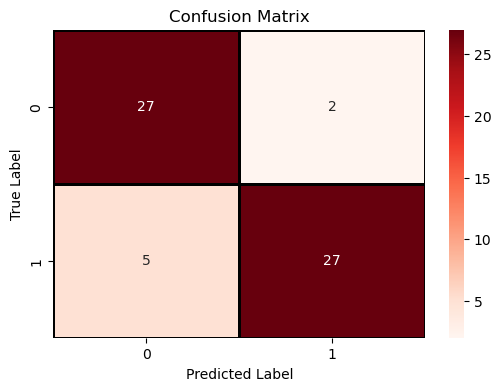

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)  # Get unique class labels
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', linewidths=1, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [38]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# Error Rate
error_rate = 1 - accuracy
print(f'Error Rate: {error_rate:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))


Confusion Matrix:
[[27  2]
 [ 5 27]]
Accuracy: 0.8852
Precision: 0.8895
Recall: 0.8852
Error Rate: 0.1148
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# K fold Cross Validation

In [39]:
from sklearn.model_selection import KFold, cross_val_score


In [40]:
# Define K-Fold Cross Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform Cross Validation
scores = cross_val_score(nb_classifier, x, y, cv=kf, scoring='accuracy')

# Print results
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.4f}')

Cross-validation scores: [0.8852459  0.81967213 0.86666667 0.7        0.8       ]
Mean accuracy: 0.8143
